In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys

sys.path.append('~/PycharmProjects/Boston_housing/')

pd.set_option('max_columns',50)
pd.set_option('max_rows',2000)

property_type = 'condo'
PROPERTY_TYPE = 'Condo/Co-op'

df = pd.read_csv('../data/raw_joined/' + 'Boston_%s_joined_dataframe.csv'%property_type,index_col=0)


In [3]:
df.head(10)

,YEAR BUILT,SQUARE FEET,$/SQUARE FEET,BEDS,BATHS,LOT SIZE,HOA/MONTH,REMARKS,LIST PRICE,SOLD PRICE,LIST DATE,SOLD DATE,convenience,supermarket,park,school,station,stop_position,EST $/SQUARE FEET,DAYS ON MKT
6258,1982.0,948.0,338.0,2.0,1.5,948.0,374.0,floor uint conveni locat station walk lot pri...,349900,320000,2017-01-20,2017-07-10,0,0,0,2,0,0,877.0,171
1970,1905.0,919.0,571.0,2.0,1.0,1114.0,160.0,renov highli desir open kitchen flood natur s...,469900,525000,2017-01-20,2017-02-28,0,0,0,2,0,2,877.0,39
1633,2016.0,1352.0,730.0,2.0,2.0,0.0,9999.0,construct bathroom corner home privat deck li...,1015000,986960,2017-01-20,2017-03-31,1,0,0,1,1,19,877.0,70
8197,2002.0,877.0,787.0,1.0,1.0,877.0,605.0,face bedroom servic elev build heart loft liv...,699000,690000,2017-01-20,2017-04-03,1,2,0,2,0,30,877.0,73
2266,1900.0,1765.0,156.0,4.0,2.0,0.0,0.0,thi contact list agent inform room bedroom co...,269900,275900,2017-01-21,2017-03-24,0,0,0,3,0,0,877.0,62
7511,1890.0,385.0,1117.0,1.0,1.0,0.0,414.0,the apart locat heart desir street close line...,389900,430000,2017-01-22,2017-03-03,4,1,1,6,2,19,877.0,40
7883,1910.0,952.0,457.0,2.0,1.0,952.0,218.0,great view renov maintain ha locat walk dista...,429900,435000,2017-01-22,2017-03-17,0,0,0,2,0,0,877.0,54
2264,1925.0,800.0,344.0,2.0,1.0,0.0,200.0,vibrant cityliv rare price newli updat build ...,269900,275000,2017-01-23,2017-04-03,0,0,0,5,0,0,509.5,70
6901,1901.0,1398.0,1341.0,2.0,2.5,0.0,1286.0,rare opportun garag park thi bedroom twoandah...,1890000,1875000,2017-01-23,2017-03-10,1,2,3,6,1,6,509.5,46
4158,1910.0,1660.0,1476.0,3.0,2.0,1660.0,732.0,renov meticul attent bedroom bathroom resid f...,2590000,2450000,2017-01-23,2017-03-27,1,0,3,13,1,3,509.5,63


In [4]:
df.loc[2872]

YEAR BUILT                                                        1910
SQUARE FEET                                                       1213
$/SQUARE FEET                                                      568
BEDS                                                                 3
BATHS                                                                2
LOT SIZE                                                          1710
HOA/MONTH                                                          257
REMARKS               bed bath penthous privat roof complet renov h...
LIST PRICE                                                      749000
SOLD PRICE                                                      689000
LIST DATE                                                   2017-04-27
SOLD DATE                                                   2017-08-07
convenience                                                          1
supermarket                                                          0
park  

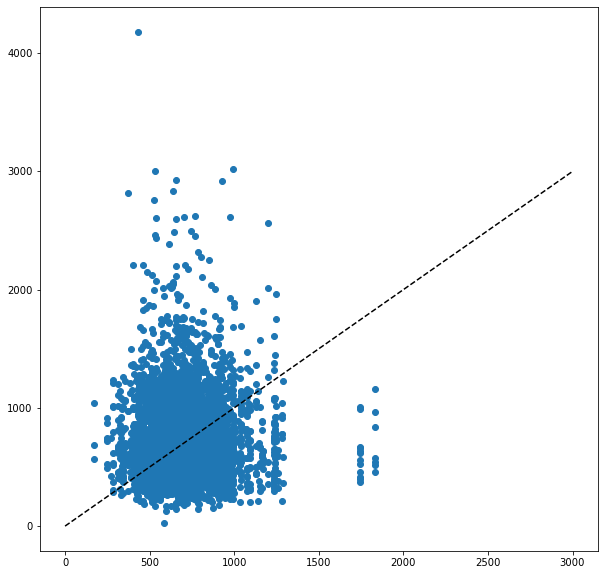

In [5]:
fig = plt.figure(figsize=(10,10))
plt.scatter(df['EST $/SQUARE FEET'],df['$/SQUARE FEET'])
plt.plot(list(range(0,3000)),list(range(0,3000)),'k--')

In [6]:
np.mean(np.abs(df['EST $/SQUARE FEET']-df['$/SQUARE FEET'])/df['$/SQUARE FEET'])

0.45238981018465496

In [47]:
df['LIST MONTH'] = pd.to_datetime(df['LIST DATE']).apply(lambda x: x.month)
df['LIST YEAR'] = pd.to_datetime(df['LIST DATE']).apply(lambda x: x.year)

In [52]:
mask = (df['LIST YEAR']==2017) & (df['LIST MONTH']<4)
df[['LIST DATE','$/SQUARE FEET']][mask].groupby('LIST DATE').mean().set_index('LIST DATE').plot(figsize=(15,10))

KeyError: "None of ['LIST DATE'] are in the columns"

In [19]:
df['LIST MONTH'] = pd.to_datetime(df['LIST DATE']).apply(lambda x: x.month)
df['LIST YEAR'] = pd.to_datetime(df['LIST DATE']).apply(lambda x: x.year)

(500.0, 1000.0)

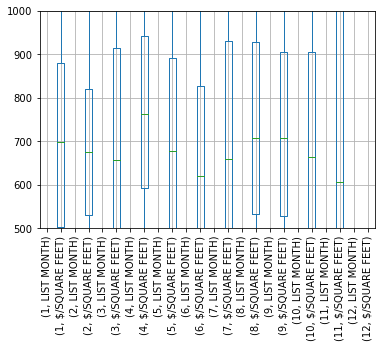

In [43]:
mask = (df['LIST YEAR']==2019)
df[['LIST MONTH','$/SQUARE FEET']][mask].groupby('LIST MONTH').boxplot(subplots=False, rot=90)
plt.ylim([500,1000])